In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from sklearn.svm import OneClassSVM
import matplotlib.pyplot as plt


In [ ]:
from google.colab import files
uploaded=files.upload()

Saving customer_data.xlsx to customer_data.xlsx


In [ ]:
df=pd.read_excel('customer_data.xlsx')

In [ ]:
df.head()

,customer_id,age,annual_income,spending_score,num_purchases,avg_purchase_value,time_on_site,num_returned_items
0,1.0,56.0,63570.0,13.0,196.0,434.024606,36.878819,22.0
1,2.0,NaN,39503.0,77.0,39.0,326.472080,19.775023,28.0
2,3.0,46.0,148851.0,70.0,94.0,76.447814,12.028276,46.0
3,NaN,32.0,101840.0,22.0,10.0,28.969129,49.189135,10.0
4,5.0,60.0,146827.0,42.0,152.0,129.576863,25.322757,15.0


In [ ]:
df.shape

(10000, 8)

In [ ]:
df.isnull().sum()

,0
customer_id,508
age,483
annual_income,511
spending_score,516
num_purchases,499
avg_purchase_value,481
time_on_site,512
num_returned_items,484


In [ ]:
df.drop_duplicates()

,customer_id,age,annual_income,spending_score,num_purchases,avg_purchase_value,time_on_site,num_returned_items
0,1.0,56.0,63570.0,13.0,196.0,434.024606,36.878819,22.0
1,2.0,NaN,39503.0,77.0,39.0,326.472080,19.775023,28.0
2,3.0,46.0,148851.0,70.0,94.0,76.447814,12.028276,46.0
3,NaN,32.0,101840.0,22.0,10.0,28.969129,49.189135,10.0
4,5.0,60.0,146827.0,42.0,152.0,129.576863,25.322757,15.0
...,...,...,...,...,...,...,...,...
9995,9996.0,25.0,96610.0,16.0,188.0,86.091151,46.698542,46.0
9996,9997.0,38.0,72193.0,74.0,29.0,371.537035,6.226455,13.0
9997,9998.0,73.0,81634.0,31.0,20.0,162.922508,14.607900,2.0
9998,9999.0,23.0,29679.0,100.0,5.0,388.724305,30.499660,4.0


In [ ]:
df = df.dropna(subset=['customer_id'])


In [ ]:
from sklearn.impute import SimpleImputer
feature=df.drop('customer_id',axis=1
                )

In [ ]:
imputer = SimpleImputer(strategy="median")
features_imputed = imputer.fit_transform(feature)

In [ ]:
df_cleaned = pd.DataFrame(features_imputed, columns=feature.columns)
df_cleaned.insert(0, "customer_id", df['customer_id'].values)


In [ ]:
df_cleaned['customer_id'] = df_cleaned['customer_id'].astype(int)
df_cleaned.to_csv('pca_transformed_customers.csv', index=False)


In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9492 entries, 0 to 9491
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_id         9492 non-null   int64  
 1   age                 9492 non-null   float64
 2   annual_income       9492 non-null   float64
 3   spending_score      9492 non-null   float64
 4   num_purchases       9492 non-null   float64
 5   avg_purchase_value  9492 non-null   float64
 6   time_on_site        9492 non-null   float64
 7   num_returned_items  9492 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 593.4 KB


In [ ]:
# use feature scaling using correlation matrix

In [ ]:
X=df_cleaned.drop(['customer_id'],axis=1)


In [ ]:
scalar=StandardScaler()
df_cleaned=scalar.fit_transform(df_cleaned)
df_cleaned

array([[-1.72849246,  0.37431448, -0.48669666, ...,  1.30198033,
         0.38071126, -0.22726258],
       [-1.72814602, -0.01969327, -1.11524165, ...,  0.51965025,
        -0.64897274,  0.19232631],
       [-1.72779958, -0.18855374,  1.74054171, ..., -1.29901004,
        -1.11534294,  1.45109297],
       ...,
       [ 1.73487497,  1.33119044, -0.01492881, ..., -0.66999873,
        -0.96004425, -1.6258922 ],
       [ 1.73522141, -1.48315062, -1.37180982, ...,  0.97246889,
        -0.00332731, -1.48602924],
       [ 1.73556785, -0.63884831, -0.85402476, ..., -1.63451561,
        -1.73004624, -0.85664591]])

In [ ]:
# do the feature selection
selector = VarianceThreshold(threshold=0.01)
X_selected = selector.fit_transform(df_cleaned)


In [ ]:
pca = PCA(n_components=0.95, random_state=42)
X_pca = pca.fit_transform(X_selected)
len(X_pca[0])

8

In [ ]:
iso_forest = IsolationForest(contamination=0.05, random_state=42)
anomaly_scores = iso_forest.fit_predict(X_pca)
anomaly_factors = iso_forest.decision_function(X_pca)

In [ ]:
df["anomaly_score"] = anomaly_scores
df["anomaly_factor"] = anomaly_factors

In [ ]:
top_anomalies = df[df["anomaly_score"] == -1].nsmallest(10, "anomaly_factor")[["customer_id", "anomaly_factor"]]
iso_anomalies = (anomaly_scores == -1)


In [ ]:
print(top_anomalies)
# print(iso_anomalies)

      customer_id  anomaly_factor
9634       9635.0       -0.115812
1232       1233.0       -0.113600
9289       9290.0       -0.112967
4564       4565.0       -0.112449
4140       4141.0       -0.111356
7717       7718.0       -0.109971
644         645.0       -0.107510
6897       6898.0       -0.102596
9817       9818.0       -0.098075
9296       9297.0       -0.092569


In [ ]:
# lets do it using the svm

In [ ]:
svm_model = OneClassSVM(nu=0.05, kernel="rbf", gamma='scale')
svm_preds = svm_model.fit_predict(X_pca)

In [ ]:
svm_anomalies = (svm_preds == -1)
sum(svm_anomalies)

np.int64(474)

In [ ]:
both_anomalies = iso_anomalies & svm_anomalies
num_common = np.sum(both_anomalies)
print(f" Customers flagged as anomalies by both methods: {num_common}")

 Customers flagged as anomalies by both methods: 321


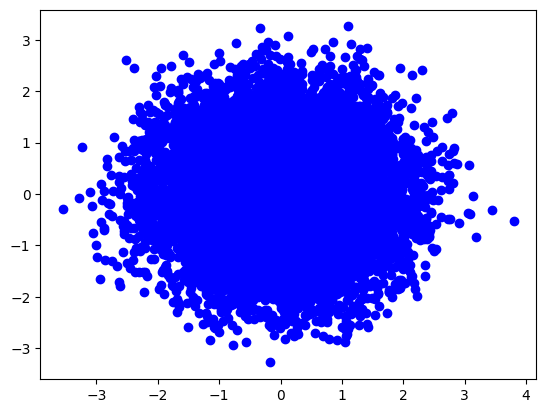

In [ ]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c='blue', label='Normal')


In [3]:
plt.scatter(X_pca[iso_anomalies, 0], X_pca[iso_anomalies, 1], c='orange', label='Isolation Forest', alpha=0.6,edgecolors='r')
# plt.scatter(X_pca[svm_anomalies, 0], X_pca[svm_anomalies, 1], c='blue', label='One-Class SVM', alpha=0.6)
# plt.scatter(X_pca[both_anomalies, 0], X_pca[both_anomalies, 1], c='red', label='Both', marker='x', s=70)



NameError: name 'plt' is not defined